In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy

In [22]:
data = pd.read_csv("train.csv")

Первая задача стояла в том, чтобы предобработать датасет.

In [24]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Как мы выидим, в столбцах "Age", "Cabin", "Embarked" есть значения NaN, которые следует заменить. 
В столбце "Age" мы заменим возраст на текущий медианный возраст.
Столбец "Cabin" нам не нужен, поэтому заполним значением "AAA111"
В Столбеце "Embarked" заменим NaN на значение N. 

In [25]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Cabin"].fillna("AAA111") = data["Cabin"].fillna("AAA111")
data["Embarked"] = data["Embarked"].fillna("N")

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Далее сказано построить матрицу корреляции. Выберем для этого такие стобцы, как 
Age,SibSp,Parch. Этим покажем зависимость возраста от колличества родственных связей на борту.

In [28]:
data[["Age", "SibSp", "Parch"]].corr()

,Age,SibSp,Parch
Age,1.000000,-0.308247,-0.189119
SibSp,-0.308247,1.000000,0.414838
Parch,-0.189119,0.414838,1.000000


Далее требуется построить гистрограмму. Построим гистрограмму, показывающую абсолютные значения возрастов пассажиров и относительные. Тут стоит учесть, что возраст 28 лет не совсем корректен, т.к. значения NaN были заменены именно на него.

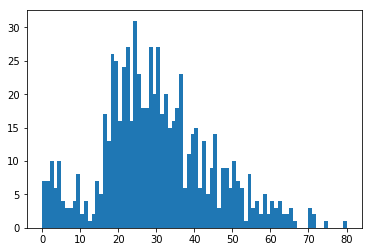

In [29]:
#Абсолюитные значения
plt.hist(data["Age"], bins=range(0, int(max(data["Age"]))+1))
plt.show()

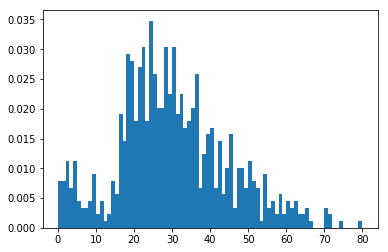

In [30]:
#В % соотношении друг к другу
in_percent = np.ones_like(data["Age"])/float(len(data["Age"]))
plt.hist(data["Age"], bins=range(0, int(max(data["Age"]))+1), weights = in_percent)
plt.show()

Последняя задача. Найти самое часто встречающееся женское имя.
Находим сначала все значения столбца "Name" при значении столбца "Sex" female.
И запишем в find_most_popular_female_name (fmpfn)

In [36]:
fmpfn = data[data['Sex'] == 'female']
fmpfn.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


Далее требуется выделить только имя.
Тут женщины делятся на 2 типа Miss и Mrs.
Также у неокторых женщин 2 имена. Мы будем использовать то, которое первое.

In [37]:
def miss_name_cuter(x):
    if x.find(' ', (x.find("Miss")+6)) == -1:
        return x[(x.find("Miss")+6):]
    else:
        return x[(x.find("Miss")+6): (x.find(' ', (x.find("Miss")+6)))]
def mrs_name_cuter(x):
    return x[(x.find("(")+1): (x.find(' ', (x.find("(")+1)))]
miss_names = fmpfn["Name"].apply(lambda x: x if x.find("Miss") != -1 else 0)
miss_names = miss_names[miss_names != 0].reset_index(drop=True)
mrs_names = fmpfn["Name"].apply(lambda x: x if x.find("Mrs") != -1 else 0)
mrs_names = mrs_names[mrs_names != 0].reset_index(drop=True)
miss_names = miss_names.apply(lambda x: miss_name_cuter(x))
mrs_names = mrs_names.apply(lambda x: mrs_name_cuter(x))
pd.concat([mrs_names, miss_names], axis=0).value_counts().head(1)

Anna    15
Name: Name, dtype: int64

В итоге самое популярное женское имя "Anna", оно встречалось в датасете 15 раз.
Следущее задание - высчитать средний и медианный возраст.
Добавив немного креативности, вывожу средние и мединные возраста мужчин и женщин.

In [186]:
print("Средний возраст мужчин -", data[data["Sex"] == "male"]["Age"].mean())
print("Медианный возраст мужчин -", data[data["Sex"] == "male"]["Age"].median())
print("Средний возраст женщин -", data[data["Sex"] == "female"]["Age"].mean())
print("Медианный возраст женщин -", data[data["Sex"] == "female"]["Age"].median())
print("Общий средний возраст -", data["Age"].mean())
print("Общий медианный возраст -", data["Age"].median())

Средний возраст мужчин - 30.72664459161148
Медианный возраст мужчин - 29.0
Средний возраст женщин - 27.915708812260537
Медианный возраст женщин - 27.0
Общий средний возраст - 29.69911764705882
Общий медианный возраст - 28.0


Исходя из полученных данных можно сказать, что мужчины начинают любить путешетвия позже, чем женщины.
Следущее задание было придумать что-нибудь интересное, связанное с городом посадки.

In [220]:
print("Инфа сколько мужчин зашло в определенном городе")
print(data[(data["Sex"]=="male")].groupby("Embarked").count()["PassengerId"])
print("-------------------------------------------------------------")
print("Инфа сколько женщин зашло в определенном городе")
print(data[(data["Sex"]=="female")].groupby("Embarked").count()["PassengerId"])

Инфа сколько мужчин зашло в определенном городе
Embarked
C     95
Q     41
S    441
Name: PassengerId, dtype: int64
-------------------------------------------------------------
Инфа сколько женщин зашло в определенном городе
Embarked
C     73
Q     36
S    203
Name: PassengerId, dtype: int64
